In [1]:
# importing the necessary library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from numpy import arange

In [2]:
# reading the data
df=pd.read_csv('loan_sanction.csv')

In [3]:
# Visualizing the table
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Check for duplicate data
duplicate = df[df.duplicated(['Loan_ID'])]
duplicate

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


<AxesSubplot:xlabel='Loan_Status'>

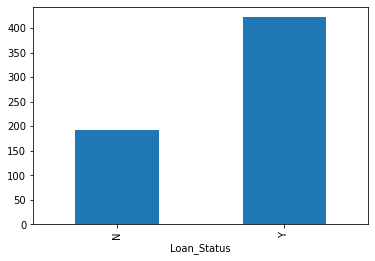

In [6]:
# distribution of Loan_Status
Loan_Status=df.groupby(by='Loan_Status').size()
Loan_Status.plot.bar()

In [7]:
# number of missing value for every attributes
df.isnull().sum().sort_values()

Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
Married               3
Gender               13
Loan_Amount_Term     14
Dependents           15
LoanAmount           22
Self_Employed        32
Credit_History       50
dtype: int64

Text(0.5, 1.0, 'Total Missing Values')

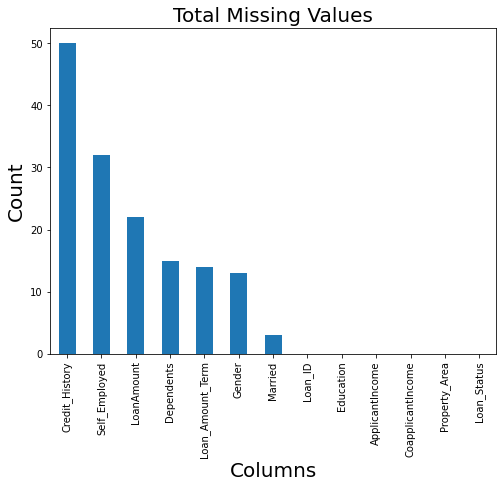

In [8]:
# number of missing value plotted
total = df.isnull().sum().sort_values(ascending=False)
total_select = total.head(20)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)

In [9]:
# finding number of unique value for each Variable
columns=df.columns.tolist()
columns.remove('Loan_ID')# loan_ID is not a really a variable
df[columns].nunique().sort_values(ascending=False)

ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Dependents             4
Property_Area          3
Gender                 2
Married                2
Education              2
Self_Employed          2
Credit_History         2
Loan_Status            2
dtype: int64

In [10]:
# casting the datatype of a variable based on the number of unique value for that variable
for i in columns:
    unique_values = df[i].nunique()
    if unique_values > 10:
        df[i]=df[i].astype(float)
    else:
        df[i]=df[i].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    object 
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(3), object(10)
memory usage: 62.5+ KB


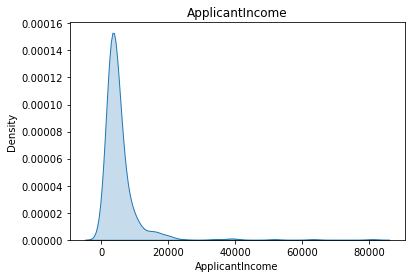

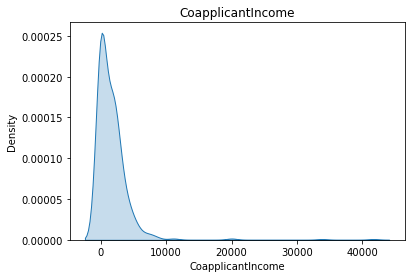

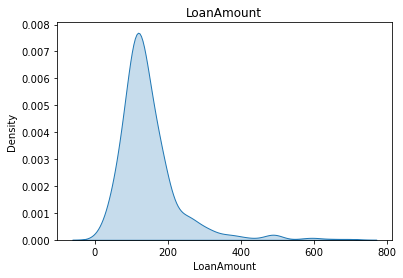

In [11]:
# skewness of continuous variable is visuallly shown
for col in df.select_dtypes(include=['float']).columns:
    sns.kdeplot(df[col], shade=True)
    plt.title(col)
    plt.show()

In [12]:
# The skewness of the continuous variable is checked.
mask = df.dtypes == np.float
float_cols = df.columns[mask]
skew_vals = df[float_cols].skew()
print(pd.DataFrame(skew_vals))

                          0
ApplicantIncome    6.539513
CoapplicantIncome  7.491531
LoanAmount         2.677552


In [13]:
# missing value for continuous variable is filled with median because the continuous variables are skewed
from sklearn.impute import SimpleImputer
imputer_continuous = SimpleImputer(strategy='median')
imputer_continuous.fit(df[float_cols])
df[float_cols] = imputer_continuous.transform(df[float_cols])

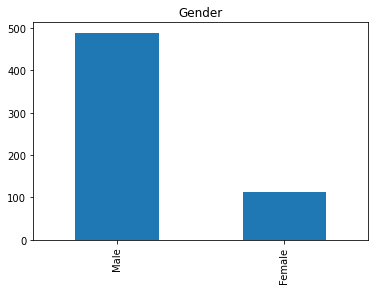

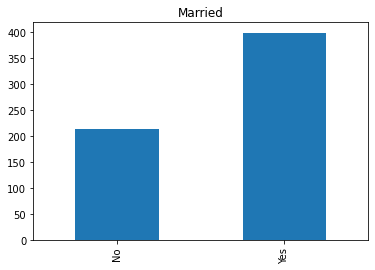

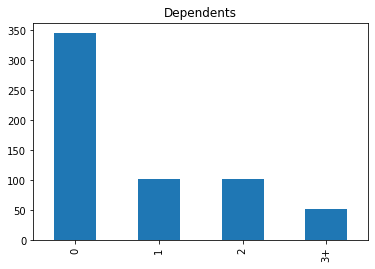

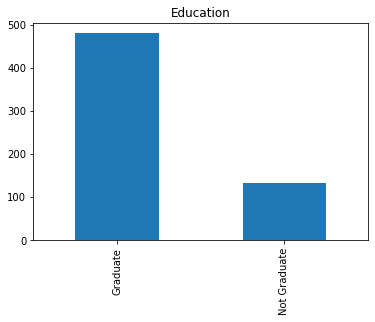

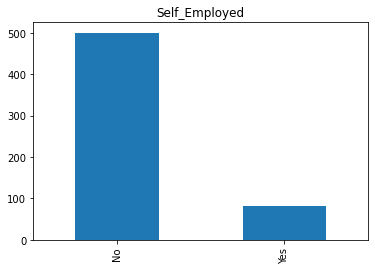

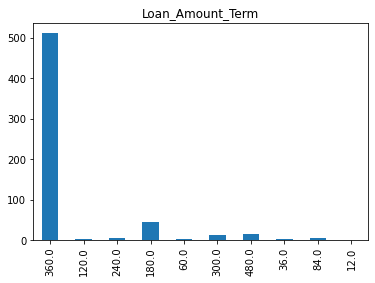

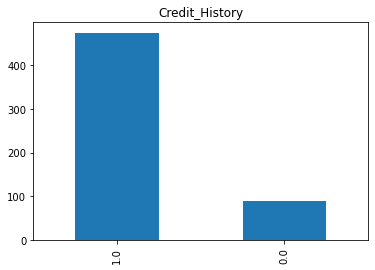

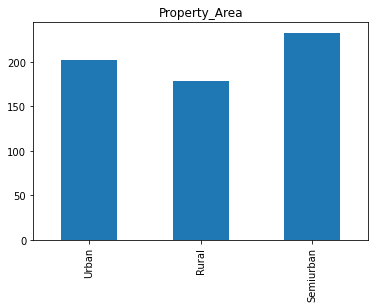

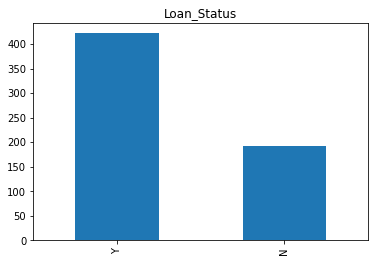

In [14]:
# distribution of categorical variables
mask1 = df.dtypes == np.object
category_cols = df.columns[mask1]
category_cols=category_cols.tolist()
category_cols.remove('Loan_ID')
for col in category_cols:
    df[col].value_counts(sort=False).plot.bar()
    plt.title(col)
    plt.show()

In [15]:
# missing value for categorical variable is filled with mode or most_frequently occuring class in a vaiable
imputer_categorical = SimpleImputer(strategy='most_frequent')
imputer_categorical.fit(df[category_cols])
df[category_cols] = imputer_categorical.transform(df[category_cols])

In [16]:
# three copy of main dataframe is created
X=df.copy()
X1=df.copy()
X2=df.copy()

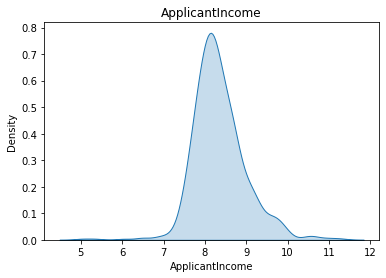

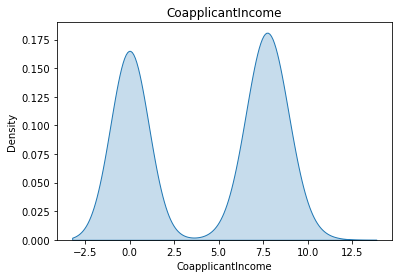

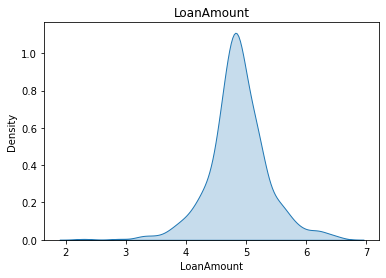

                       skew
ApplicantIncome    0.482128
CoapplicantIncome -0.173073
LoanAmount        -0.151578


In [17]:
#fixing of skew of contnuous variables
from scipy.stats import boxcox
for col in X2.select_dtypes(include=['float']).columns:
    if X2[col].skew()>0:
        X2[col]=np.log1p(X2[col])
    else:
        X2[col]=np.sqrt(X2[col])
    sns.kdeplot(X2[col], shade=True)
    plt.title(col)
    plt.show()
skew_vals = X2[float_cols].skew()
skew_vals = (skew_vals.to_frame().rename(columns={0:'skew'}))
print(skew_vals)

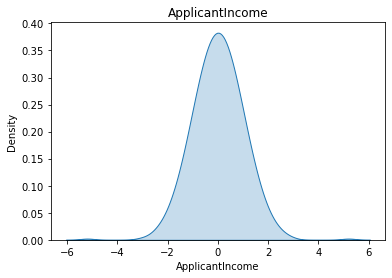

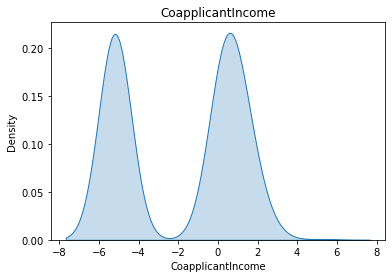

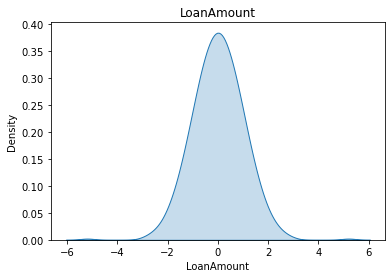

                       skew
ApplicantIncome   -0.005627
CoapplicantIncome -0.131532
LoanAmount        -0.000938


In [18]:
# From the visuals it can be told that coapplicant variable's distribution did't fixed
# We will try some other method
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
for col in X.select_dtypes(include=['float']).columns:
    qt=0
    qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
    X[col]=qt.fit_transform(np.array(X[col]).reshape(-1, 1))
    sns.kdeplot(X[col], shade=True)
    plt.title(col)
    plt.show() 
skew_vals = X[float_cols].skew()
skew_vals = (skew_vals.to_frame().rename(columns={0:'skew'}))
print(skew_vals)

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

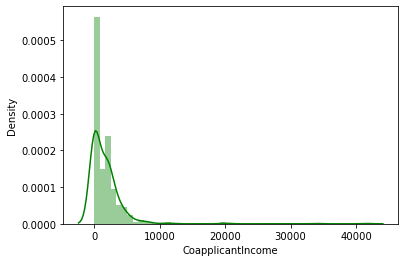

In [19]:
# We still didn't manage to fix  the issue with Co-applicant income
# So we will convert this continuos variable to categorical variable
sns.distplot(df['CoapplicantIncome'],color='green',hist=True)

Text(0.5, 1.0, 'CoapplicantIncome')

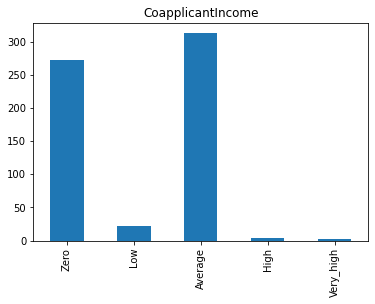

In [20]:
# converting the continuos variable Co-applicantincome to categorical variable
# print(X1['CoapplicantIncome'].max())
# print(X1['CoapplicantIncome'].min())
bins = [-0.1, 0.1, 1000, 10000, 20000,42000]
X['CoapplicantIncome'] = pd.cut(df['CoapplicantIncome'], bins, labels=['Zero', 'Low', 'Average','High','Very_high'])
X['CoapplicantIncome'].value_counts(sort=False).plot.bar()
plt.title('CoapplicantIncome')

In [21]:
X.dtypes

Loan_ID                object
Gender                 object
Married                object
Dependents             object
Education              object
Self_Employed          object
ApplicantIncome       float64
CoapplicantIncome    category
LoanAmount            float64
Loan_Amount_Term       object
Credit_History         object
Property_Area          object
Loan_Status            object
dtype: object

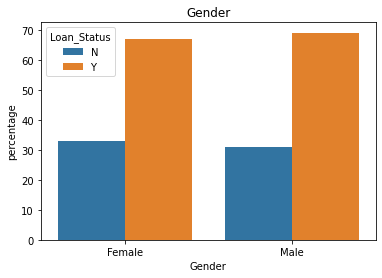

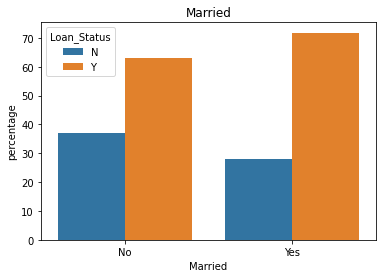

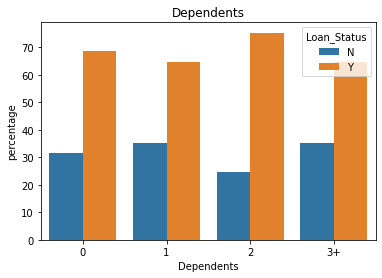

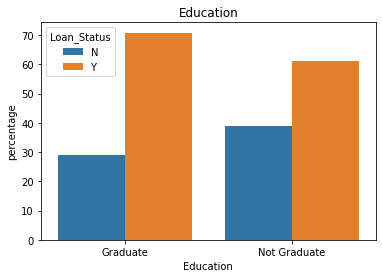

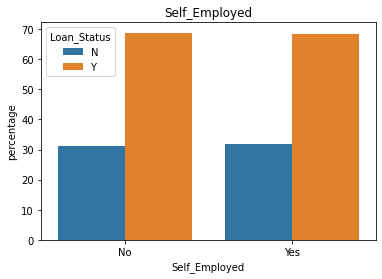

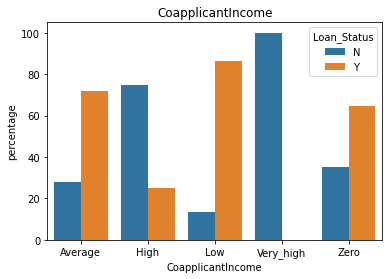

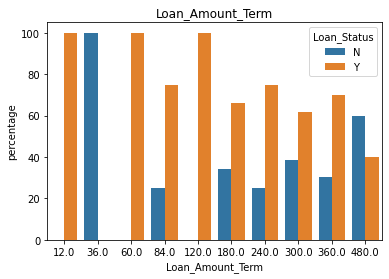

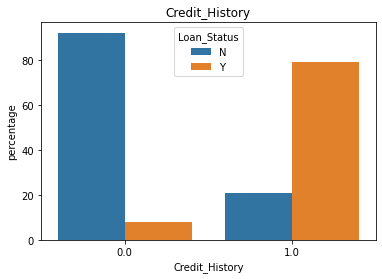

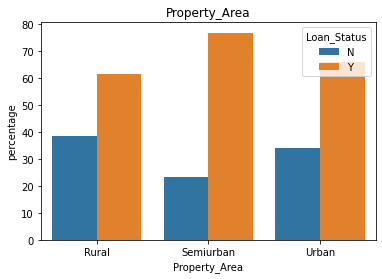

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome     object
LoanAmount           float64
Loan_Amount_Term      object
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

In [22]:
# the percentage distribution of Loan_Status for different categorical variable
X['CoapplicantIncome']=X['CoapplicantIncome'].astype('object')
mask2 = X.dtypes == np.object
category_cols = X.columns[mask2]
category_cols=category_cols.tolist()
category_cols.remove('Loan_ID')
for col in category_cols:
        if col!='Loan_Status':
            # calculate the percentage of occurrences
            percentage = X.groupby(['Loan_Status',col]).size().div(X.groupby([col]).size(), level=col)*100
            percentage = percentage.reset_index(name='percentage')

            # Create a stacked bar chart
            # plt.figure(figsize=(10, 8))
            sns.barplot(x=col, y='percentage', hue='Loan_Status', data=percentage, dodge=True)
            plt.title(col)
            plt.show()
X.dtypes            

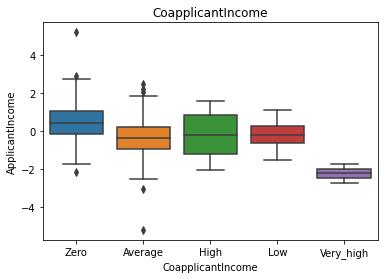

In [23]:
# Distribution of ApplicantIncome for different category of Co-applicant Income
sns.boxplot(x='CoapplicantIncome', y='ApplicantIncome', data=X)
plt.title('CoapplicantIncome')
plt.show()

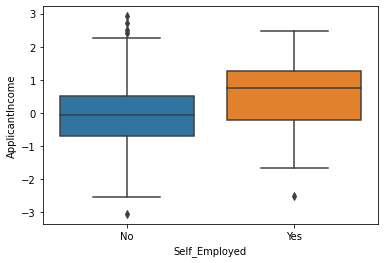

In [24]:
# Distribution of ApplicantIncome for different category of Self_Employed for Loan_Status ‘Yes’
Y_Loan_Status=X.loc[X.Loan_Status=="Y"]
sns.boxplot(x='Self_Employed', y='ApplicantIncome',data=Y_Loan_Status)
plt.show()

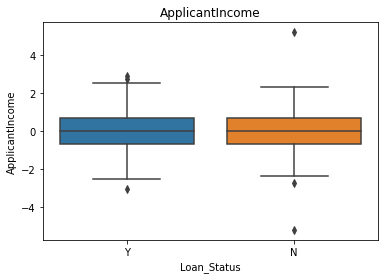

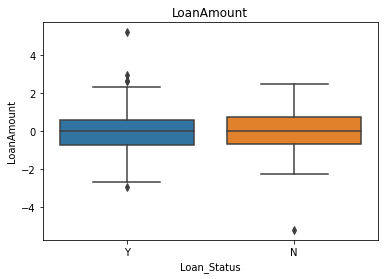

In [25]:
# Distribution of Continuous Variable within different category of Loan_Status
for col in X.select_dtypes(include=['float']).columns:
    sns.boxplot(x='Loan_Status', y=col, data=X)
    plt.title(col)
    plt.show()

In [26]:
# let's give our first hypothesis
# Null hypothesis: The loan_status of a person being yes or no doesn't depend on the gender of the person
# Alternate Hypothesis:The loan_status of a person being yes or no does depend on the gender of the person
# We set the significance level for p-value to be 0.05

In [27]:
# chi_square test is performed
from scipy.stats import chi2_contingency
ct = pd.crosstab(X['Gender'], X['Loan_Status'])
chi2, p, dof, expected = chi2_contingency(ct)
print(f'chi2: {chi2}, p-value: {p}')

chi2: 0.11087854691241235, p-value: 0.7391461310869638


In [28]:
# Based on p-value we can't reject Null Hypothesis for First case

In [29]:
# Second Hypothesis
# Null hypothesis: The loan_status of a person doesn't depend on ApplicantIncome.
# Alternate Hypothesis: The loan_status of a person does depend on ApplicantIncome.
# We set the significance level for p-value to be 0.05

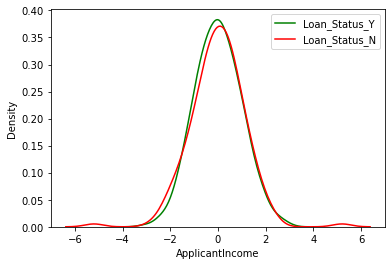

In [30]:
# first a visual inspection is done
Y_Loan_Status=X.loc[X.Loan_Status=="Y"]
N_Loan_Status=X.loc[X.Loan_Status=="N"]
Y_ApplicantIncome = Y_Loan_Status.ApplicantIncome
N_ApplicantIncome = N_Loan_Status.ApplicantIncome
sns.distplot(Y_ApplicantIncome,color='green',hist=False)
sns.distplot(N_ApplicantIncome,color='red',hist=False)
plt.legend(['Loan_Status_Y', 'Loan_Status_N'])

In [31]:
# Welch's t-test
import scipy.stats as stats 
t_value, p_value = stats.ttest_ind(Y_ApplicantIncome, N_ApplicantIncome)
print("t_value1 = ",t_value, ", p_value1 = ", p_value)

t_value1 =  0.13390067687823742 , p_value1 =  0.8935251346015676


In [32]:
# F-test
from scipy import stats
import pandas as pd

# Use the f_oneway() function to perform the F-test
f, p = stats.f_oneway(Y_ApplicantIncome, N_ApplicantIncome)

# Print the results
print("F-statistic:", f)
print("p-value:", p)

F-statistic: 0.01792939126845008
p-value: 0.8935251346015533


In [33]:
# Based on p-value from both tests we can't reject Null Hypothesis for Second case

In [34]:
# Third Hypothesis:
# Null hypothesis: The loan_status of a person doesn't depend on Property_Area.
# Alternate Hypothesis: The loan_status of a person does depend on Property_Area.
# We set the significance level for p-value to be 0.05

In [35]:
# chi_square test is performed
ct1 = pd.crosstab(df['Property_Area'], df['Loan_Status'])
chi2, p, dof, expected = chi2_contingency(ct1)
print(f'chi2: {chi2}, p-value: {p}')

chi2: 12.297623130485675, p-value: 0.0021360187811644937


In [36]:
# Based on p-value we will reject Null Hypothesis and accept ALternate Hypothesis for Third case